### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships

     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
# Importing the cleaned dataset
bike_cleaned = pd.read_csv(r'/Users/peterguan/Citi Bike Analysis/02 Data/Prepared Data/bike.csv', index_col = False)

In [6]:
# Checking if the dataset imported successfully
bike_cleaned.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,45
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,30
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,24
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,25
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,35


In [7]:
# Checking the dimensions of the dataset
bike_cleaned.shape

(49972, 20)

In [8]:
# Checking the datatypes of the columns
bike_cleaned.dtypes

Unnamed: 0                   int64
trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
age                          int64
dtype: object

### 2. Exploring Relationships

### Correlations:

#### Creating a correlation heatmap using seaborns:

In [12]:
# Listing all the columns in the dataset
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age'],
      dtype='object')

In [13]:
# Creating a subset with 7 columns excluding all OBJECT/STRING columns
bike_sub = bike_cleaned[[ 'start_hour','trip_duration', 'age', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]

In [14]:
# Created a correlation matrix using pandas
bike_sub.corr()

,start_hour,trip_duration,age,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
start_hour,1.000000,0.040942,-0.062552,-0.009097,-0.045824,-0.036962,0.007046
trip_duration,0.040942,1.000000,0.015429,-0.025180,-0.007099,-0.043889,0.001239
age,-0.062552,0.015429,1.000000,0.045235,-0.023689,0.041245,-0.034000
start_station_latitude,-0.009097,-0.025180,0.045235,1.000000,0.211761,0.585707,0.078061
start_station_longitude,-0.045824,-0.007099,-0.023689,0.211761,1.000000,0.092929,0.418265
end_station_latitude,-0.036962,-0.043889,0.041245,0.585707,0.092929,1.000000,0.200084
end_station_longitude,0.007046,0.001239,-0.034000,0.078061,0.418265,0.200084,1.000000


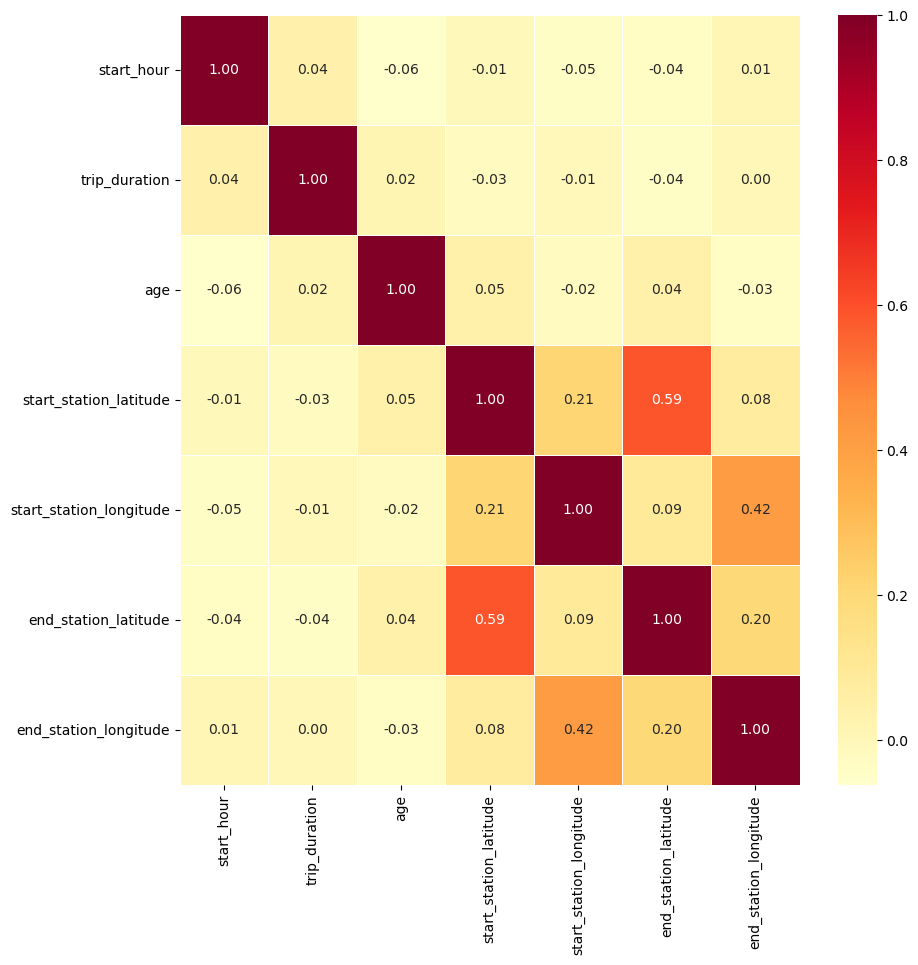

In [15]:
# Created a subplot with matplotlib
plt.figure(figsize=(10, 10))

# Created the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
bike_correlation = sns.heatmap(bike_sub.corr(), annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5, linecolor='white')

plt.show()

### Scatterplots:

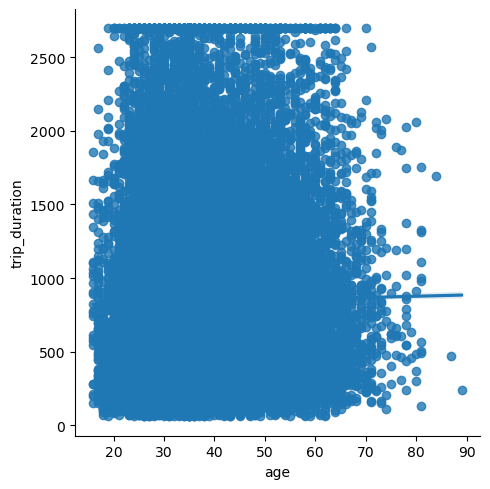

In [17]:
# Creating a scatterplot for the 'age' and 'trip_duration' columns in Seaborn

sns.lmplot(x = 'age', y = 'trip_duration', data = bike_sub)

### Pair Plots:

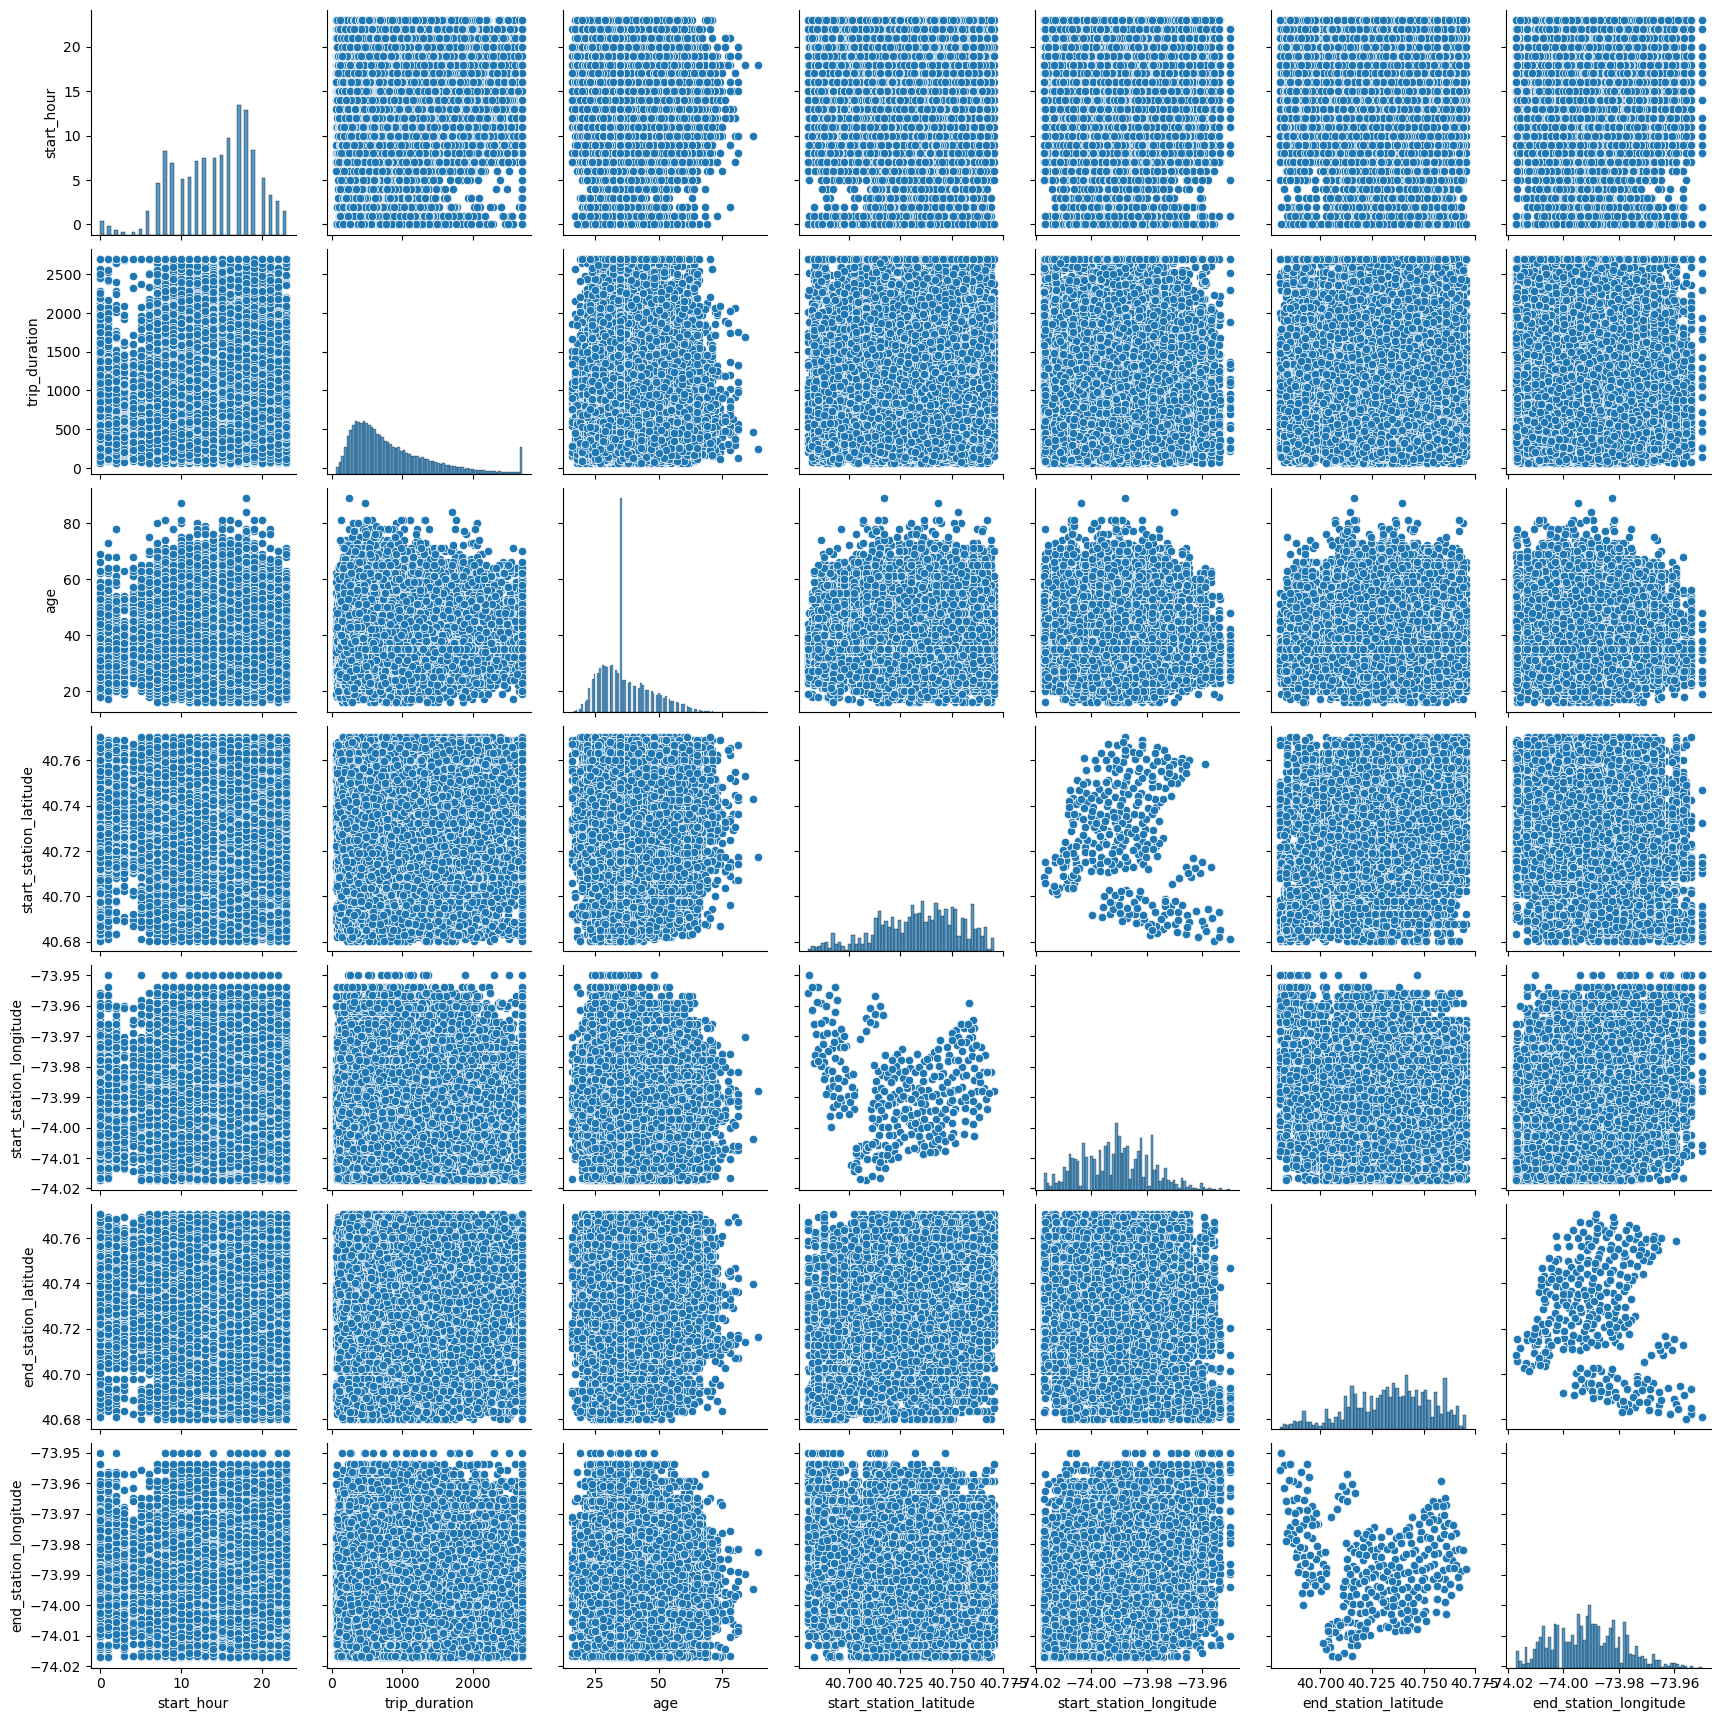

In [19]:
# Creating the PAIR PLOTS with the 'bike_sub' subset WITHOUT 'unnamed' and 'ID' columns
bike_pair_plot = sns.pairplot(bike_sub)

### Categorical Plots:

#### Creating a categorical variable that splits the "start_hour" column into 3 different categories:

<Axes: xlabel='start_hour', ylabel='Count'>

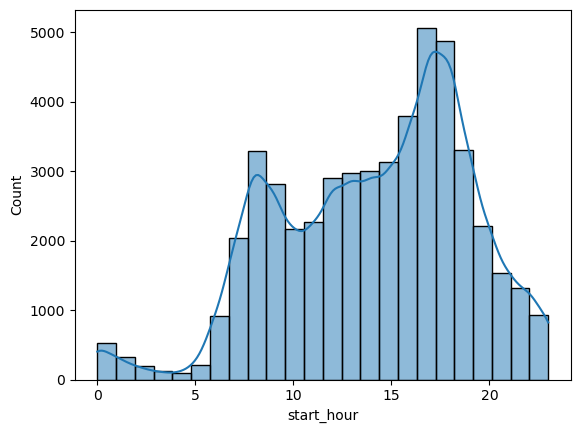

In [22]:
# Creating a HISTOGRAM to visualize the distribution of the 'start_hour' column

sns.histplot(bike_cleaned['start_hour'], bins = 24, kde = True)

In [23]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 6) & (bike_cleaned['start_hour'] <= 12), 'time_of_day'] = 'Morning'

In [24]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 12) & (bike_cleaned['start_hour'] <= 18), 'time_of_day'] = 'Afternoon'

In [25]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 18) | (bike_cleaned['start_hour'] <= 6), 'time_of_day'] = 'Night'

In [26]:
# Counting the frequency of each variable in the 'time_of_day' column
bike_cleaned['time_of_day'].value_counts(dropna = False)

time_of_day
Afternoon    20861
Night        16542
Morning      12569
Name: count, dtype: int64

In [27]:
# Checking if the time_of_day column was created successfully
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age', 'time_of_day'],
      dtype='object')

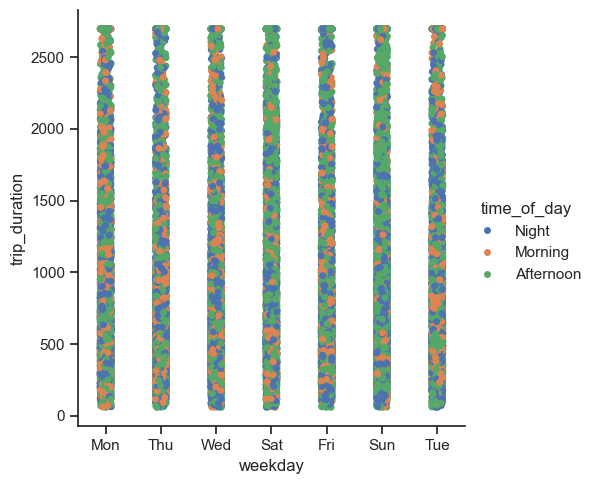

In [28]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
bike_categorical_plot = sns.catplot(x='weekday', y='trip_duration', hue="time_of_day", data=bike_cleaned)

### Additional data exploration

In [30]:
# Checking the descriptive statistics
bike_cleaned.describe()

,Unnamed: 0,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,age
count,49972.000000,49972.00000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000
mean,25001.073301,17615.30313,14.145922,443.306792,40.734170,-73.991106,442.526035,40.733860,-73.991348,838.916873,1975.999240,37.000760
std,14431.811916,1675.10716,4.860677,356.582817,0.019911,0.012553,355.701958,0.019885,0.012569,573.687019,10.178138,10.178138
min,0.000000,14556.00000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,16.000000
25%,12501.750000,16188.00000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1970.000000,30.000000
50%,25002.500000,17584.00000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.990985,672.000000,1978.000000,35.000000
75%,37497.250000,19014.00000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1983.000000,43.000000
max,49999.000000,20642.00000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,89.000000


In [31]:
# Checking all the column names 
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age', 'time_of_day'],
      dtype='object')

In [32]:
# Checking the top 10 stations in the 'start_station_name' column
bike_cleaned['start_station_name'].value_counts(dropna = False).head(10)

start_station_name
W 20 St & 11 Ave           536
Lafayette St & E 8 St      505
Pershing Square N          503
E 17 St & Broadway         496
West St & Chambers St      465
8 Ave & W 31 St            410
University Pl & E 14 St    405
Broadway & E 14 St         402
W 4 St & 7 Ave S           386
W 41 St & 8 Ave            365
Name: count, dtype: int64

In [33]:
# Checking the 10 least popular stations in the 'start_station_name' column
bike_cleaned['start_station_name'].value_counts(dropna = False).tail(10)

start_station_name
Clinton Ave & Flushing Ave       19
Hancock St & Bedford Ave         17
3 Ave & Schermerhorn St          15
Clermont Ave & Park Ave          14
Hanover Pl & Livingston St       14
Park Ave & St Edwards St         11
Cadman Plaza E & Red Cross Pl    11
Franklin Ave & Myrtle Ave         8
Railroad Ave & Kay Ave            5
7 Ave & Farragut St               5
Name: count, dtype: int64

In [34]:
# Creating age groups
bike_cleaned.loc[(bike_cleaned['age'] >= 16) & (bike_cleaned['age'] <= 24), 'age_group'] = '16-24'
bike_cleaned.loc[(bike_cleaned['age'] >= 25) & (bike_cleaned['age'] <= 34), 'age_group'] = '25-34'
bike_cleaned.loc[(bike_cleaned['age'] >= 35) & (bike_cleaned['age'] <= 44), 'age_group'] = '35-44'
bike_cleaned.loc[(bike_cleaned['age'] >= 45) & (bike_cleaned['age'] <= 54), 'age_group'] = '45-54'
bike_cleaned.loc[(bike_cleaned['age'] >= 55) & (bike_cleaned['age'] <= 64), 'age_group'] = '55-64'
bike_cleaned.loc[(bike_cleaned['age'] >= 65) & (bike_cleaned['age'] <= 74), 'age_group'] = '65-74'
bike_cleaned.loc[bike_cleaned['age'] >= 75, 'age_group'] = '75+'

In [35]:
# Counting the frequency of each variable in the 'age_group' column
bike_cleaned['age_group'].value_counts(dropna = False)

age_group
35-44    18457
25-34    16989
45-54     7186
16-24     3740
55-64     3029
65-74      519
75+         52
Name: count, dtype: int64

In [46]:
bike_cleaned.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,time_of_day,age_group
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,45,Night,45-54
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,30,Night,25-34
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,24,Night,16-24
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,25,Morning,25-34
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,35,Night,35-44


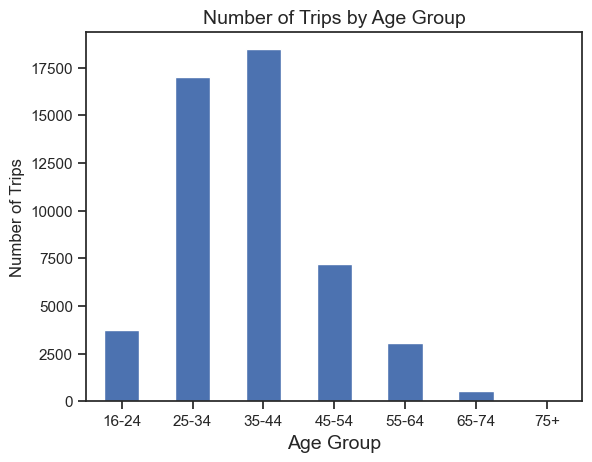

In [36]:
# Group by 'age' and count the number of 'trip_id' values for each age group
trip_counts_by_age = bike_cleaned.groupby('age_group')['trip_id'].count()

# Create the bar chart
bike_bar = trip_counts_by_age.plot.bar()

# Adding a TITLE and LABELS
plt.title('Number of Trips by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=0)

plt.show()

### Exporting the dataset

In [42]:
path = r'/Users/peterguan/Citi Bike Analysis'

In [44]:
bike_cleaned.to_csv(os.path.join(path, '02 Data','Prepared Data', 'bike.csv'))